# Problem Statement :
You are a cab rental start-up company. You have successfully run the pilot project and
now want to launch your cab service across the country. You have collected the
historical data from your pilot project and now have a requirement to apply analytics for
fare prediction. You need to design a system that predicts the fare amount for a cab ride
in the city.

In [1]:
#Importing required libraries
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import scipy.stats
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
%matplotlib inline

In [2]:
#Setting the working directory
os.chdir("C:/Users/Sreejith/Documents/Sreejith/Edwisor/Project 1/Proj")
os.getcwd()

'C:\\Users\\Sreejith\\Documents\\Sreejith\\Edwisor\\Project 1\\Proj'

In [3]:
#Loading the data
df= pd.read_csv("train_cab.csv")
df1= pd.read_csv("test.csv")

# Studying the data:

In [4]:
#Checking the first 5 rows to understand the train data
df.head() 

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,4.5,2009-06-15 17:26:21 UTC,-73.844311,40.721319,-73.841610,40.712278,1.0
1,16.9,2010-01-05 16:52:16 UTC,-74.016048,40.711303,-73.979268,40.782004,1.0
2,5.7,2011-08-18 00:35:00 UTC,-73.982738,40.761270,-73.991242,40.750562,2.0
3,7.7,2012-04-21 04:30:42 UTC,-73.987130,40.733143,-73.991567,40.758092,1.0
4,5.3,2010-03-09 07:51:00 UTC,-73.968095,40.768008,-73.956655,40.783762,1.0


In [5]:
# shape and data types of the data
print(df.shape)
print(df.dtypes) 

(16067, 7)
fare_amount           object
pickup_datetime       object
pickup_longitude     float64
pickup_latitude      float64
dropoff_longitude    float64
dropoff_latitude     float64
passenger_count      float64
dtype: object


In [6]:
df.describe()

,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
count,16067.000000,16067.000000,16067.000000,16067.000000,16012.000000
mean,-72.462787,39.914725,-72.462328,39.897906,2.625070
std,10.578384,6.826587,10.575062,6.187087,60.844122
min,-74.438233,-74.006893,-74.429332,-74.006377,0.000000
25%,-73.992156,40.734927,-73.991182,40.734651,1.000000
50%,-73.981698,40.752603,-73.980172,40.753567,1.000000
75%,-73.966838,40.767381,-73.963643,40.768013,2.000000
max,40.766125,401.083332,40.802437,41.366138,5345.000000


In [7]:
#Checking the number of null values
print (df.isnull().sum())

fare_amount          24
pickup_datetime       0
pickup_longitude      0
pickup_latitude       0
dropoff_longitude     0
dropoff_latitude      0
passenger_count      55
dtype: int64


In [8]:
#Checking the first 5 rows to understand the test data
df1.head()

,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,2015-01-27 13:08:24 UTC,-73.973320,40.763805,-73.981430,40.743835,1
1,2015-01-27 13:08:24 UTC,-73.986862,40.719383,-73.998886,40.739201,1
2,2011-10-08 11:53:44 UTC,-73.982524,40.751260,-73.979654,40.746139,1
3,2012-12-01 21:12:12 UTC,-73.981160,40.767807,-73.990448,40.751635,1
4,2012-12-01 21:12:12 UTC,-73.966046,40.789775,-73.988565,40.744427,1


In [9]:
# shape and data types of the data
print(df1.shape)
print(df1.dtypes)

(9914, 6)
pickup_datetime       object
pickup_longitude     float64
pickup_latitude      float64
dropoff_longitude    float64
dropoff_latitude     float64
passenger_count        int64
dtype: object


In [10]:
df1.describe()

,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
count,9914.000000,9914.000000,9914.000000,9914.000000,9914.000000
mean,-73.974722,40.751041,-73.973657,40.751743,1.671273
std,0.042774,0.033541,0.039072,0.035435,1.278747
min,-74.252193,40.573143,-74.263242,40.568973,1.000000
25%,-73.992501,40.736125,-73.991247,40.735254,1.000000
50%,-73.982326,40.753051,-73.980015,40.754065,1.000000
75%,-73.968013,40.767113,-73.964059,40.768757,2.000000
max,-72.986532,41.709555,-72.990963,41.696683,6.000000


In [11]:
#Checking the number of null values
print (df1.isnull().sum())

pickup_datetime      0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    0
dropoff_latitude     0
passenger_count      0
dtype: int64


# Data pre-processing and cleaning

# Train data

In [12]:
# Convert datatypes
df["fare_amount"]=pd.to_numeric(df["fare_amount"],errors="coerce") #As there was a non-numeric error at a location, errors="coerce" replaced it with NaN 
df.dtypes

fare_amount          float64
pickup_datetime       object
pickup_longitude     float64
pickup_latitude      float64
dropoff_longitude    float64
dropoff_latitude     float64
passenger_count      float64
dtype: object

In [13]:
df["pickup_datetime"] =pd.to_datetime(df.pickup_datetime,errors='coerce', format= '%Y-%m-%d %H:%M:%S UTC') #As there was a ValueError: time data '43' does not match format '%Y-%m-%d %H:%M:%S UTC',errors="coerce" replaced it with NaN. 
df.dtypes

fare_amount                 float64
pickup_datetime      datetime64[ns]
pickup_longitude            float64
pickup_latitude             float64
dropoff_longitude           float64
dropoff_latitude            float64
passenger_count             float64
dtype: object

In [14]:
print(df.shape)
print (df.isnull().sum())

(16067, 7)
fare_amount          25
pickup_datetime       1
pickup_longitude      0
pickup_latitude       0
dropoff_longitude     0
dropoff_latitude      0
passenger_count      55
dtype: int64


In [15]:
df=df.dropna() #droping NaN values.There are only 81 missing values in 16067

In [16]:
df.describe()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
count,15986.000000,15986.000000,15986.000000,15986.000000,15986.000000,15986.000000
mean,15.030453,-72.464352,39.915577,-72.463909,39.898671,2.623272
std,431.213944,10.573594,6.829028,10.570256,6.186375,60.892140
min,-3.000000,-74.438233,-74.006893,-74.429332,-74.006377,0.000000
25%,6.000000,-73.992144,40.734935,-73.991182,40.734647,1.000000
50%,8.500000,-73.981691,40.752603,-73.980168,40.753549,1.000000
75%,12.500000,-73.966817,40.767353,-73.963644,40.768005,2.000000
max,54343.000000,40.766125,401.083332,40.802437,41.366138,5345.000000


Observations:
1.passenger_count is having outlier as the count can range from 1 to 6 or 7 considering SUV cabs. Min is 0 and max is 5345.
2. Max and Min value of fare_amount seems unrealistic
3.pickup_latitude can range from -90 to 90 and max 401+ value indicates outlier and longitude range is -180 to 180


In [17]:
#Convert passenger_count to integer
df['passenger_count']=df['passenger_count'].astype('int64')

In [18]:
#Lets clean the passenger_count first
from collections import Counter
Counter(df['passenger_count']>6)

Counter({False: 15967, True: 19})

In [19]:
Counter(df['passenger_count']==0)

Counter({False: 15928, True: 58})

In [20]:
df.passenger_count.unique()

array([   1,    2,    3,    6,    5,    4,  236,  456, 5334,    0,  535,
        354,  554,   53,   35,  345, 5345,  536,   43,   58,  537,   87,
        531,  557], dtype=int64)

OBSERVATION: We have to remove the  values outside the range 1 to 6

In [21]:
#Drop indexes with passenger count=0 and greater than 6
df= df.drop(df[df['passenger_count']>6].index, axis=0)
df= df.drop(df[df['passenger_count']==0].index, axis=0)
df.passenger_count.unique()

array([1, 2, 3, 6, 5, 4], dtype=int64)

In [22]:
df.passenger_count.describe()

count    15909.000000
mean         1.649569
std          1.265769
min          1.000000
25%          1.000000
50%          1.000000
75%          2.000000
max          6.000000
Name: passenger_count, dtype: float64

In [23]:
df.passenger_count.head()

0    1
1    1
2    2
3    1
4    1
Name: passenger_count, dtype: int64

In [24]:
df.fare_amount.describe()

count    15909.000000
mean        15.059678
std        432.255920
min         -3.000000
25%          6.000000
50%          8.500000
75%         12.500000
max      54343.000000
Name: fare_amount, dtype: float64

<AxesSubplot:xlabel='fare_amount'>

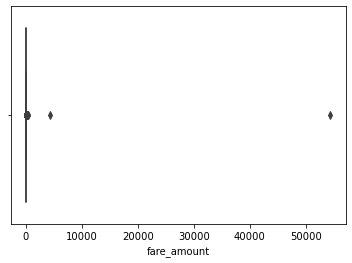

In [25]:
#Lets see if we can visualize the outliers by boxplot
sns.boxplot(x=df['fare_amount'])

In [26]:
Counter(df['fare_amount']>50)

Counter({False: 15693, True: 216})

In [27]:
Counter(df['fare_amount']<1)

Counter({False: 15904, True: 5})

In [28]:
print(df['fare_amount'].sort_values(ascending=True))

13032       -3.00
2039        -2.90
2486        -2.50
10002        0.00
2780         0.01
           ...   
1335       180.00
980        434.00
607        453.00
1072      4343.00
1015     54343.00
Name: fare_amount, Length: 15909, dtype: float64


##### Observation:
1. fare_amount after 453 takes a huge leap to 4343 and 54343(outliers) 
2. First 5 values of fare_amount is unrealistic

In [29]:
#Removing outliers and unrealistic fare_amount
df= df.drop(df[df['fare_amount']>453].index, axis=0)
df= df.drop(df[df['fare_amount']<1].index, axis=0)
df.fare_amount.describe()

count    15902.000000
mean        11.376356
std         10.814908
min          1.140000
25%          6.000000
50%          8.500000
75%         12.500000
max        453.000000
Name: fare_amount, dtype: float64

In [30]:
#Check for unrealistic longitude and latitude
print(Counter(df['pickup_latitude']<-90))
print(Counter(df['pickup_latitude']>90))
print(Counter(df['pickup_longitude']<-180))
print(Counter(df['pickup_longitude']>180))
print(Counter(df['dropoff_latitude']<-90))
print(Counter(df['dropoff_latitude']>90))
print(Counter(df['dropoff_longitude']<-180))
print(Counter(df['dropoff_longitude']<-180))

Counter({False: 15902})
Counter({False: 15901, True: 1})
Counter({False: 15902})
Counter({False: 15902})
Counter({False: 15902})
Counter({False: 15902})
Counter({False: 15902})
Counter({False: 15902})


In [31]:
df= df.drop(df[df['pickup_latitude']>90].index, axis=0)
df.describe()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
count,15901.000000,15901.000000,15901.000000,15901.000000,15901.000000,15901.000000
mean,11.376864,-72.474894,39.898732,-72.465150,39.899265,1.649708
std,10.815059,10.538777,6.186797,10.566703,6.186423,1.265877
min,1.140000,-74.438233,-74.006893,-74.429332,-74.006377,1.000000
25%,6.000000,-73.992145,40.734948,-73.991181,40.734716,1.000000
50%,8.500000,-73.981693,40.752640,-73.980158,40.753565,1.000000
75%,12.500000,-73.966815,40.767382,-73.963643,40.768026,2.000000
max,453.000000,40.766125,41.366138,40.802437,41.366138,6.000000


In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15901 entries, 0 to 16065
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   fare_amount        15901 non-null  float64       
 1   pickup_datetime    15901 non-null  datetime64[ns]
 2   pickup_longitude   15901 non-null  float64       
 3   pickup_latitude    15901 non-null  float64       
 4   dropoff_longitude  15901 non-null  float64       
 5   dropoff_latitude   15901 non-null  float64       
 6   passenger_count    15901 non-null  int64         
dtypes: datetime64[ns](1), float64(5), int64(1)
memory usage: 993.8 KB


# Test data

In [33]:
#Change datatypes
df1.pickup_datetime =  pd.to_datetime(df1['pickup_datetime'],format='%Y-%m-%d %H:%M:%S UTC')
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9914 entries, 0 to 9913
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   pickup_datetime    9914 non-null   datetime64[ns]
 1   pickup_longitude   9914 non-null   float64       
 2   pickup_latitude    9914 non-null   float64       
 3   dropoff_longitude  9914 non-null   float64       
 4   dropoff_latitude   9914 non-null   float64       
 5   passenger_count    9914 non-null   int64         
dtypes: datetime64[ns](1), float64(4), int64(1)
memory usage: 464.8 KB


In [34]:
df1.describe()

,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
count,9914.000000,9914.000000,9914.000000,9914.000000,9914.000000
mean,-73.974722,40.751041,-73.973657,40.751743,1.671273
std,0.042774,0.033541,0.039072,0.035435,1.278747
min,-74.252193,40.573143,-74.263242,40.568973,1.000000
25%,-73.992501,40.736125,-73.991247,40.735254,1.000000
50%,-73.982326,40.753051,-73.980015,40.754065,1.000000
75%,-73.968013,40.767113,-73.964059,40.768757,2.000000
max,-72.986532,41.709555,-72.990963,41.696683,6.000000


In [35]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9914 entries, 0 to 9913
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   pickup_datetime    9914 non-null   datetime64[ns]
 1   pickup_longitude   9914 non-null   float64       
 2   pickup_latitude    9914 non-null   float64       
 3   dropoff_longitude  9914 non-null   float64       
 4   dropoff_latitude   9914 non-null   float64       
 5   passenger_count    9914 non-null   int64         
dtypes: datetime64[ns](1), float64(4), int64(1)
memory usage: 464.8 KB


# Feature Engineering

Now, we have to analyse the dependance of fare_amount on each variable. For this purpose, we need to split the pickup_datetime to year, month, date, day of the week and hour and calculate distance of travel using the longitude and latitude data.

In [36]:
#Split datetime to year, month, date, day of the week, and hour.
df['year']=df['pickup_datetime'].dt.year
df['month']=df['pickup_datetime'].dt.month
df['date']=df['pickup_datetime'].dt.day
df['day']=df['pickup_datetime'].dt.dayofweek
df['hour']=df['pickup_datetime'].dt.hour
df.head()

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,year,month,date,day,hour
0,4.5,2009-06-15 17:26:21,-73.844311,40.721319,-73.841610,40.712278,1,2009,6,15,0,17
1,16.9,2010-01-05 16:52:16,-74.016048,40.711303,-73.979268,40.782004,1,2010,1,5,1,16
2,5.7,2011-08-18 00:35:00,-73.982738,40.761270,-73.991242,40.750562,2,2011,8,18,3,0
3,7.7,2012-04-21 04:30:42,-73.987130,40.733143,-73.991567,40.758092,1,2012,4,21,5,4
4,5.3,2010-03-09 07:51:00,-73.968095,40.768008,-73.956655,40.783762,1,2010,3,9,1,7


In [37]:
df1['year']=df1['pickup_datetime'].dt.year
df1['month']=df1['pickup_datetime'].dt.month
df1['date']=df1['pickup_datetime'].dt.day
df1['day']=df1['pickup_datetime'].dt.dayofweek
df1['hour']=df1['pickup_datetime'].dt.hour
df1.head()

,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,year,month,date,day,hour
0,2015-01-27 13:08:24,-73.973320,40.763805,-73.981430,40.743835,1,2015,1,27,1,13
1,2015-01-27 13:08:24,-73.986862,40.719383,-73.998886,40.739201,1,2015,1,27,1,13
2,2011-10-08 11:53:44,-73.982524,40.751260,-73.979654,40.746139,1,2011,10,8,5,11
3,2012-12-01 21:12:12,-73.981160,40.767807,-73.990448,40.751635,1,2012,12,1,5,21
4,2012-12-01 21:12:12,-73.966046,40.789775,-73.988565,40.744427,1,2012,12,1,5,21


In [38]:
print(df.info())
print(df.describe())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15901 entries, 0 to 16065
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   fare_amount        15901 non-null  float64       
 1   pickup_datetime    15901 non-null  datetime64[ns]
 2   pickup_longitude   15901 non-null  float64       
 3   pickup_latitude    15901 non-null  float64       
 4   dropoff_longitude  15901 non-null  float64       
 5   dropoff_latitude   15901 non-null  float64       
 6   passenger_count    15901 non-null  int64         
 7   year               15901 non-null  int64         
 8   month              15901 non-null  int64         
 9   date               15901 non-null  int64         
 10  day                15901 non-null  int64         
 11  hour               15901 non-null  int64         
dtypes: datetime64[ns](1), float64(5), int64(6)
memory usage: 1.6 MB
None
        fare_amount  pickup_longitude  pickup_l

In [39]:
print(df1.info())
print(df1.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9914 entries, 0 to 9913
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   pickup_datetime    9914 non-null   datetime64[ns]
 1   pickup_longitude   9914 non-null   float64       
 2   pickup_latitude    9914 non-null   float64       
 3   dropoff_longitude  9914 non-null   float64       
 4   dropoff_latitude   9914 non-null   float64       
 5   passenger_count    9914 non-null   int64         
 6   year               9914 non-null   int64         
 7   month              9914 non-null   int64         
 8   date               9914 non-null   int64         
 9   day                9914 non-null   int64         
 10  hour               9914 non-null   int64         
dtypes: datetime64[ns](1), float64(4), int64(6)
memory usage: 852.1 KB
None
       pickup_longitude  pickup_latitude  dropoff_longitude  dropoff_latitude  \
count       9914.0000

Now, we have to calculate the distance.Euclidean Distance works for the flat surface like a Cartesian plain however, Earth is not flat. So we have to use a special type of formula known as Haversine Distance.
Haversine Distance can be defined as the angular distance between two locations on the Earth’s surface.


In [40]:
def haversine_np(lon1, lat1, lon2, lat2):
    """
    Calculate the great circle distance between two points
    on the earth (specified in decimal degrees)

    All args must be of equal length.    

    """
    lon1, lat1, lon2, lat2 = map(np.radians, [lon1, lat1, lon2, lat2])

    dlon = lon2 - lon1
    dlat = lat2 - lat1

    a = np.sin(dlat/2.0)**2 + np.cos(lat1) * np.cos(lat2) * np.sin(dlon/2.0)**2

    c = 2 * np.arcsin(np.sqrt(a))
    km = 6367 * c
    return km

In [41]:
#Apply the function to df to calculate distance
df['distance'] = haversine_np(df['pickup_longitude'],df['pickup_latitude'],df['dropoff_longitude'],df['dropoff_latitude'])

In [42]:
df.head()

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,year,month,date,day,hour,distance
0,4.5,2009-06-15 17:26:21,-73.844311,40.721319,-73.841610,40.712278,1,2009,6,15,0,17,1.030117
1,16.9,2010-01-05 16:52:16,-74.016048,40.711303,-73.979268,40.782004,1,2010,1,5,1,16,8.444828
2,5.7,2011-08-18 00:35:00,-73.982738,40.761270,-73.991242,40.750562,2,2011,8,18,3,0,1.388653
3,7.7,2012-04-21 04:30:42,-73.987130,40.733143,-73.991567,40.758092,1,2012,4,21,5,4,2.797513
4,5.3,2010-03-09 07:51:00,-73.968095,40.768008,-73.956655,40.783762,1,2010,3,9,1,7,1.997902


In [43]:
#Apply the function to df1 to calculate distance
df1['distance'] = haversine_np(df1['pickup_longitude'],df1['pickup_latitude'],df1['dropoff_longitude'],df1['dropoff_latitude'])

In [44]:
df1.head()

,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,year,month,date,day,hour,distance
0,2015-01-27 13:08:24,-73.973320,40.763805,-73.981430,40.743835,1,2015,1,27,1,13,2.321801
1,2015-01-27 13:08:24,-73.986862,40.719383,-73.998886,40.739201,1,2015,1,27,1,13,2.423830
2,2011-10-08 11:53:44,-73.982524,40.751260,-73.979654,40.746139,1,2011,10,8,5,11,0.618239
3,2012-12-01 21:12:12,-73.981160,40.767807,-73.990448,40.751635,1,2012,12,1,5,21,1.959801
4,2012-12-01 21:12:12,-73.966046,40.789775,-73.988565,40.744427,1,2012,12,1,5,21,5.383919


In [45]:
df['distance'].describe()

count    15901.000000
mean        15.062254
std        311.546456
min          0.000000
25%          1.215076
50%          2.124621
75%          3.848935
max       8662.100231
Name: distance, dtype: float64

In [46]:
df1['distance'].describe()

count    9914.000000
mean        3.433214
std         3.969880
min         0.000000
25%         1.297462
50%         2.216020
75%         4.042762
max        99.933258
Name: distance, dtype: float64

In [47]:
#min value =0 is unrealistic 
print(Counter(df['distance']==0))
print(Counter(df1['distance']==0))

Counter({False: 15447, True: 454})
Counter({False: 9829, True: 85})


In [48]:
#Drop distance =0 from train
df=df.drop(df[df['distance']==0].index, axis=0)
df['distance'].describe()

count    15447.000000
mean        15.504946
std        316.081038
min          0.000111
25%          1.278237
50%          2.194767
75%          3.946729
max       8662.100231
Name: distance, dtype: float64

In [49]:
#Drop distance =0 from df1
df1=df1.drop(df1[df1['distance']==0].index, axis=0)
df1['distance'].describe()

count    9829.000000
mean        3.462904
std         3.974095
min         0.001485
25%         1.319827
50%         2.234068
75%         4.062018
max        99.933258
Name: distance, dtype: float64

In [50]:
#min value =0.001(1 meter) is unrealistic 
print(Counter(df['distance']<0.01))  #we will keep 10 meter as min as there might be short distance travels in the city
print(Counter(df1['distance']<0.01))

Counter({False: 15403, True: 44})
Counter({False: 9822, True: 7})


In [51]:
#Drop distance these values
df=df.drop(df[df['distance']<0.01].index, axis=0)
df1=df1.drop(df1[df1['distance']<0.01].index, axis=0)

<AxesSubplot:xlabel='distance'>

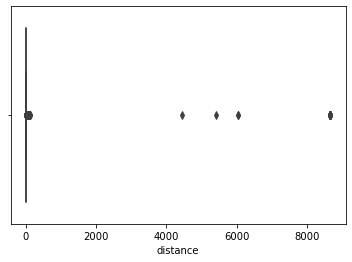

In [52]:
#Outlier analysis and cleaning of dataset 'train'
#Boxplot to analyse outliers in train
sns.boxplot(x=df['distance'])

In [53]:
#Lets sort the values in descending to see the extreme outliers
df['distance'].sort_values(ascending=False).head(30)

9147     8662.100231
8647     8662.055668
2397     8662.012603
472      8661.863245
11653    8661.260159
13340    8661.172356
10215    8661.143435
4597     8661.124771
10458    8660.535332
10672    8660.261673
10488    8660.115009
1260     8659.828143
4278     8659.783350
6188     8658.751720
12983    8658.692077
6302     8657.600077
12705    8655.924160
14197    8651.701280
15783    8651.279094
15749    6025.141548
2280     6022.710512
5864     5417.585418
7014     4444.294617
10710     129.868894
14536     129.479111
11619     127.429205
12228     123.483579
5663      101.031147
1684       99.708938
3075       97.923569
Name: distance, dtype: float64

In [54]:
#Lets sort the values in ascending to see the extreme outliers
df['distance'].sort_values(ascending=True).head(50)

2125     0.010405
1671     0.010929
1486     0.011316
12178    0.011405
7193     0.012651
4321     0.015274
14747    0.016799
10091    0.018562
6823     0.018897
11477    0.020613
2893     0.021329
8795     0.024100
13655    0.024254
1483     0.028471
12373    0.032139
10233    0.032998
3955     0.033643
7292     0.034609
6838     0.038251
922      0.038450
7918     0.038781
7622     0.042361
7398     0.043100
12567    0.045776
11294    0.049329
6226     0.059801
3657     0.061639
3750     0.066564
11272    0.066863
226      0.069110
7726     0.069762
10728    0.071956
6703     0.075503
1686     0.076929
14147    0.079594
8673     0.082591
13909    0.083938
8847     0.084007
11859    0.084719
15346    0.085719
333      0.086407
10426    0.086737
2863     0.089951
14761    0.091031
12083    0.091722
11153    0.091900
4489     0.093449
2017     0.093561
3264     0.094294
451      0.095644
Name: distance, dtype: float64

In [55]:
#Drop distance greater than 130 
df=df.drop(df[df['distance']>130].index, axis=0)
df['distance'].describe()

count    15380.000000
mean         3.450442
std          4.597237
min          0.010405
25%          1.285044
50%          2.198101
75%          3.943895
max        129.868894
Name: distance, dtype: float64

In [56]:
#Adding seasonality information
# Python3 program to print the season 
# name based on the month number 
def findseason (M) : 
      
    # Taken all the possible 
    # month numbers in the list. 
    list1 = [[12 , 1 , 2], [3 , 4 , 5],  
             [6 , 7 , 8], [9 , 10 , 11]] 
               
    # Matching the month number 
    # with the above list entries  
    if M in list1[0] : 
        return ( "WINTER" ) 
    elif M in list1[1] : 
        return ( "SPRING" ) 
    elif M in list1[2] : 
        return ( "SUMMER" ) 
    elif M in list1[3] : 
        return ( "AUTUMN" ) 
    else : 
        return ( "Invalid Month Number" ) 
  
# Driver Code 

#M = test.month
#print("For Month number:", test.month); 
#test['season'] = findseason ( M ) ;
df['season'] = df.apply(lambda x: findseason(x['month']), axis=1)
df1['season'] = df1.apply(lambda x: findseason(x['month']), axis=1)
df['season'].head()
    

0    SUMMER
1    WINTER
2    SUMMER
3    SPRING
4    SPRING
Name: season, dtype: object

Now, we have splitted the pickup_Datetime variable into different varaibles like  year, month, day etc and we have created distance using pickup and drop longitudes and latitudes so we can drop the parent variables.

In [57]:
#save cleaned data to excel
df.to_excel(r'C:/Users/Sreejith/Documents/Sreejith/Edwisor/Project 1/Rough Work/Cleaned train.xlsx', index = False)

In [58]:
df.head()

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,year,month,date,day,hour,distance,season
0,4.5,2009-06-15 17:26:21,-73.844311,40.721319,-73.841610,40.712278,1,2009,6,15,0,17,1.030117,SUMMER
1,16.9,2010-01-05 16:52:16,-74.016048,40.711303,-73.979268,40.782004,1,2010,1,5,1,16,8.444828,WINTER
2,5.7,2011-08-18 00:35:00,-73.982738,40.761270,-73.991242,40.750562,2,2011,8,18,3,0,1.388653,SUMMER
3,7.7,2012-04-21 04:30:42,-73.987130,40.733143,-73.991567,40.758092,1,2012,4,21,5,4,2.797513,SPRING
4,5.3,2010-03-09 07:51:00,-73.968095,40.768008,-73.956655,40.783762,1,2010,3,9,1,7,1.997902,SPRING


In [59]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15380 entries, 0 to 16065
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   fare_amount        15380 non-null  float64       
 1   pickup_datetime    15380 non-null  datetime64[ns]
 2   pickup_longitude   15380 non-null  float64       
 3   pickup_latitude    15380 non-null  float64       
 4   dropoff_longitude  15380 non-null  float64       
 5   dropoff_latitude   15380 non-null  float64       
 6   passenger_count    15380 non-null  int64         
 7   year               15380 non-null  int64         
 8   month              15380 non-null  int64         
 9   date               15380 non-null  int64         
 10  day                15380 non-null  int64         
 11  hour               15380 non-null  int64         
 12  distance           15380 non-null  float64       
 13  season             15380 non-null  object        
dtypes: dat

In [60]:
df.nunique()

fare_amount            447
pickup_datetime      15337
pickup_longitude     13498
pickup_latitude      13932
dropoff_longitude    13590
dropoff_latitude     13954
passenger_count          6
year                     7
month                   12
date                    31
day                      7
hour                    24
distance             15380
season                   4
dtype: int64

In [61]:
df1.nunique()

pickup_datetime      1751
pickup_longitude     9046
pickup_latitude      9169
dropoff_longitude    9064
dropoff_latitude     9285
passenger_count         6
year                    7
month                  12
date                   31
day                     7
hour                   24
distance             9822
season                  4
dtype: int64

In [62]:
#Drop redundant informations
cols = ['pickup_datetime', 'pickup_longitude', 'pickup_latitude','dropoff_longitude', 'dropoff_latitude']
df = df.drop(cols, axis = 1)
df.head()

,fare_amount,passenger_count,year,month,date,day,hour,distance,season
0,4.5,1,2009,6,15,0,17,1.030117,SUMMER
1,16.9,1,2010,1,5,1,16,8.444828,WINTER
2,5.7,2,2011,8,18,3,0,1.388653,SUMMER
3,7.7,1,2012,4,21,5,4,2.797513,SPRING
4,5.3,1,2010,3,9,1,7,1.997902,SPRING


In [63]:
df1.describe()

,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,year,month,date,day,hour,distance
count,9822.000000,9822.000000,9822.000000,9822.000000,9822.000000,9822.000000,9822.000000,9822.000000,9822.000000,9822.000000,9822.000000
mean,-73.975188,40.750785,-73.974112,40.751494,1.671045,2011.821319,6.855630,16.192222,2.853798,13.464977,3.465368
std,0.039194,0.031156,0.035090,0.033210,1.278624,1.804615,3.353814,8.839327,1.994597,6.874761,3.974438
min,-74.252193,40.573143,-74.263242,40.568973,1.000000,2009.000000,1.000000,1.000000,0.000000,0.000000,0.012231
25%,-73.992561,40.736047,-73.991274,40.735193,1.000000,2010.000000,4.000000,9.000000,1.000000,8.000000,1.322448
50%,-73.982366,40.753048,-73.980085,40.754059,1.000000,2012.000000,7.000000,16.000000,3.000000,15.000000,2.236592
75%,-73.968167,40.767044,-73.964271,40.768749,2.000000,2014.000000,10.000000,25.000000,5.000000,19.000000,4.064207
max,-72.986532,41.709555,-72.990963,41.696683,6.000000,2015.000000,12.000000,31.000000,6.000000,23.000000,99.933258


Now, we have splitted the pickup_Datetime variable into different varaibles like  year, month, day etc and we have created distance using pickup and drop longitudes and latitudes so we can drop the parent variables.

In [64]:
cols1 = ['pickup_datetime', 'pickup_longitude', 'pickup_latitude','dropoff_longitude', 'dropoff_latitude']
df1 = df1.drop(cols1, axis = 1)
df1.head()

,passenger_count,year,month,date,day,hour,distance,season
0,1,2015,1,27,1,13,2.321801,WINTER
1,1,2015,1,27,1,13,2.423830,WINTER
2,1,2011,10,8,5,11,0.618239,AUTUMN
3,1,2012,12,1,5,21,1.959801,WINTER
4,1,2012,12,1,5,21,5.383919,WINTER


In [65]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9822 entries, 0 to 9913
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   passenger_count  9822 non-null   int64  
 1   year             9822 non-null   int64  
 2   month            9822 non-null   int64  
 3   date             9822 non-null   int64  
 4   day              9822 non-null   int64  
 5   hour             9822 non-null   int64  
 6   distance         9822 non-null   float64
 7   season           9822 non-null   object 
dtypes: float64(1), int64(6), object(1)
memory usage: 690.6+ KB


In [66]:
df1=df1.dropna()

In [67]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9822 entries, 0 to 9913
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   passenger_count  9822 non-null   int64  
 1   year             9822 non-null   int64  
 2   month            9822 non-null   int64  
 3   date             9822 non-null   int64  
 4   day              9822 non-null   int64  
 5   hour             9822 non-null   int64  
 6   distance         9822 non-null   float64
 7   season           9822 non-null   object 
dtypes: float64(1), int64(6), object(1)
memory usage: 690.6+ KB


In [68]:
# # Decoding location from latitude and longitude
# !pip install geopy
#from geopy.geocoders import Nominatim
#geolocator = Nominatim(user_agent="geoapiExercises")

# dftest = train.head(10)
# dftest["pickup_area"] = df1.apply(lambda row:geolocator.reverse(str(row["pickup_latitude"])+"," + str(row["pickup_longitude"])).address.split(",")[2], axis=1)
# dftest.head()
#df1 = train.head(500)
    
#df1["pickup_location"] = df1.apply(lambda row:geolocator.reverse(str(row["pickup_latitude"])+"," + str(row["pickup_longitude"])).address.split(",")[-2], axis=1)
#df1["pickup_country"] = df1.apply(lambda row:geolocator.reverse(str(row["pickup_latitude"])+"," + str(row["pickup_longitude"])).address.split(",")[-4], axis=1)
# df1["pickup_city"] = df1.apply(lambda row:geolocator.reverse(str(row["pickup_latitude"])+"," + str(row["pickup_longitude"])).address.split(",")[-5], axis=1)
# df1["pickup_area"] = df1.apply(lambda row:geolocator.reverse(str(row["pickup_latitude"])+"," + str(row["pickup_longitude"])).address.split(",")[2], axis=1)

#df2 = train.iloc[500:500+500]
    
#df2["pickup_location"] = df2.apply(lambda row:geolocator.reverse(str(row["pickup_latitude"])+"," + str(row["pickup_longitude"])).address.split(",")[-2], axis=1)
#df2["pickup_county"] = df2.apply(lambda row:geolocator.reverse(str(row["pickup_latitude"])+"," + str(row["pickup_longitude"])).address.split(",")[-4], axis=1)
#df2["pickup_city"] = df2.apply(lambda row:geolocator.reverse(str(row["pickup_latitude"])+"," + str(row["pickup_longitude"])).address.split(",")[-5], axis=1)
# df2["pickup_area"] = df2.apply(lambda row:geolocator.reverse(str(row["pickup_latitude"])+"," + str(row["pickup_longitude"])).address.split(",")[-6], axis=1)

# df3 =  train.iloc[1000:1000+500]
    
# df3["pickup_location"] = df1.apply(lambda row:geolocator.reverse(str(row["pickup_latitude"])+"," + str(row["pickup_longitude"])).address.split(",")[-2], axis=1)
# df3["pickup_country"] = df1.apply(lambda row:geolocator.reverse(str(row["pickup_latitude"])+"," + str(row["pickup_longitude"])).address.split(",")[-4], axis=1)
# df3["pickup_city"] = df1.apply(lambda row:geolocator.reverse(str(row["pickup_latitude"])+"," + str(row["pickup_longitude"])).address.split(",")[-5], axis=1)
# df3["pickup_area"] = df1.apply(lambda row:geolocator.reverse(str(row["pickup_latitude"])+"," + str(row["pickup_longitude"])).address.split(",")[-6], axis=1)





#df["ZipCode"] = df.apply(lambda x:geolocator.reverse(str(x["pickup_latitude"])+", "+str(x["pickup_latitude"])).address.split(",")[-2], axis=1)
##print(train["pickup_location"])

#creating latitude longitude table


#Df_loc= pd.read_csv("Longitude_latitude.csv")

#Df_loc["pickup_location"] = Df_loc.apply(lambda row:geolocator.reverse(str(row["latitude"])+"," + str(row["longitude"])).address.split(",")[-2], axis=1)
# df3["pickup_country"] = df1.apply(lambda row:geolocator.reverse(str(row["pickup_latitude"])+"," + str(row["pickup_longitude"])).address.split(",")[-4], axis=1)
# df3["pickup_city"] = df1.apply(lambda row:geolocator.reverse(str(row["pickup_latitude"])+"," + str(row["pickup_longitude"])).address.split(",")[-5], axis=1)
# df3["pickup_area"] = df1.apply(lambda row:geolocator.reverse(str(row["pickup_latitude"])+"," + str(row["pickup_longitude"])).address.split(",")[-6], axis=1)




# Understanding 'fare_amount' relationship with other variables

<AxesSubplot:xlabel='hour', ylabel='count'>

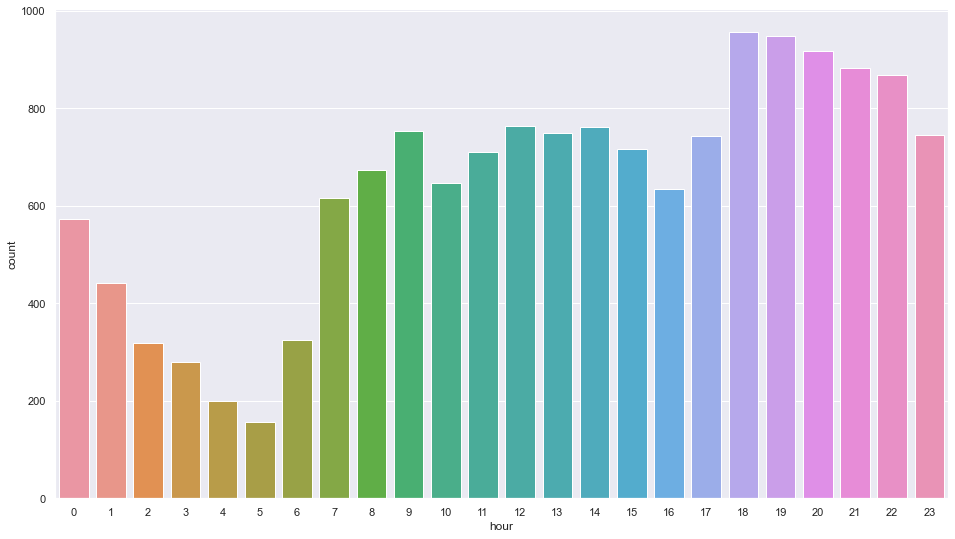

In [69]:
#Plot the graph to identify the peak hour
plt.figure(figsize=(16,9))
sns.set_theme(style="darkgrid")
sns.countplot(x='hour', data=df)

Observation:
The peak hours are from 18 to 22 and least rentals are from 2 to 6.

<AxesSubplot:xlabel='season', ylabel='count'>

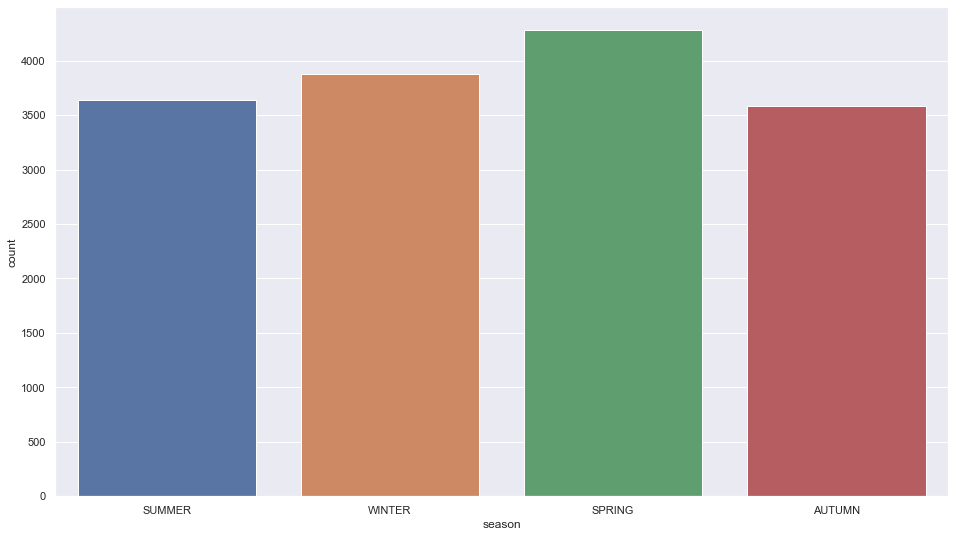

In [70]:
#Plot the graph to identify the peak season
plt.figure(figsize=(16,9))
sns.set_theme(style="darkgrid")
sns.countplot(x='season', data=df)

Observation: The peak season is Spring but no major difference with other seasons

In [71]:
#Lets Drop season
df = df.drop('season', axis = 1)
df1 = df1.drop('season', axis = 1)

In [115]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15380 entries, 0 to 16065
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   fare_amount      15380 non-null  float64
 1   passenger_count  15380 non-null  int64  
 2   year             15380 non-null  int64  
 3   month            15380 non-null  int64  
 4   date             15380 non-null  int64  
 5   day              15380 non-null  int64  
 6   hour             15380 non-null  int64  
 7   distance         15380 non-null  float64
dtypes: float64(2), int64(6)
memory usage: 1.7 MB


In [114]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9822 entries, 0 to 9913
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   passenger_count  9822 non-null   int64  
 1   year             9822 non-null   int64  
 2   month            9822 non-null   int64  
 3   date             9822 non-null   int64  
 4   day              9822 non-null   int64  
 5   hour             9822 non-null   int64  
 6   distance         9373 non-null   float64
dtypes: float64(1), int64(6)
memory usage: 613.9 KB


In [119]:
df1=df1.dropna()
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9373 entries, 0 to 9913
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   passenger_count  9373 non-null   int64  
 1   year             9373 non-null   int64  
 2   month            9373 non-null   int64  
 3   date             9373 non-null   int64  
 4   day              9373 non-null   int64  
 5   hour             9373 non-null   int64  
 6   distance         9373 non-null   float64
dtypes: float64(1), int64(6)
memory usage: 585.8 KB


<AxesSubplot:xlabel='passenger_count', ylabel='count'>

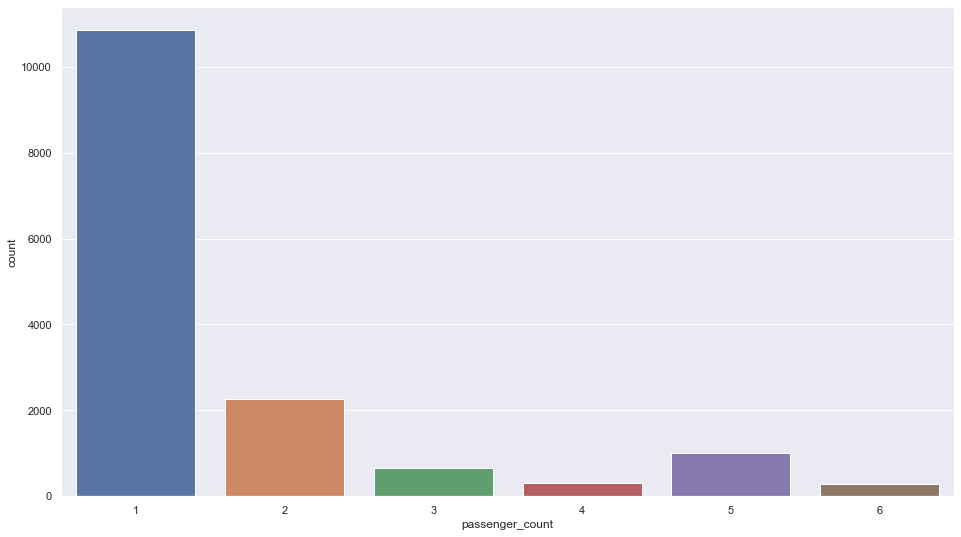

In [72]:
#Plot the graph to identify the peak season
plt.figure(figsize=(16,9))
sns.set_theme(style="darkgrid")
sns.countplot(x='passenger_count', data=df)

Observation: Most cab travels are with single passenger

<AxesSubplot:xlabel='date', ylabel='count'>

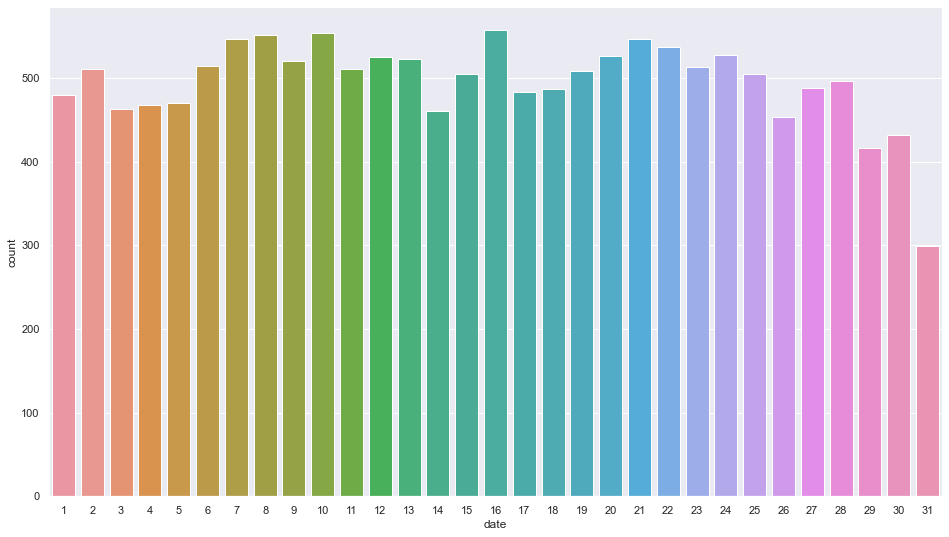

In [73]:
#Plot the graph to identify if day of the month has any effect on cab rides
plt.figure(figsize=(16,9))
sns.set_theme(style="darkgrid")
sns.countplot(x='date', data=df)

<Figure size 648x1152 with 0 Axes>

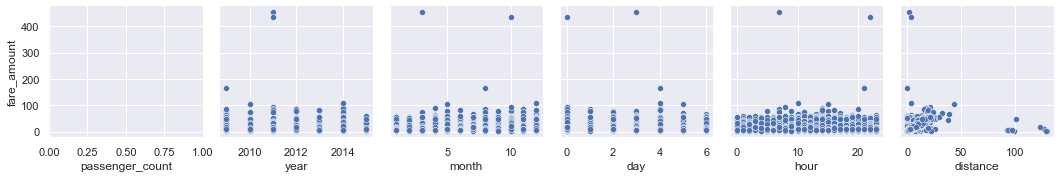

In [74]:
plt.figure(figsize=(9,16))
sns.pairplot(data=df,x_vars=['passenger_count','year','month','day','hour','distance'],y_vars=['fare_amount'])

C:\Users\Sreejith\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Distribution of fare_amount')

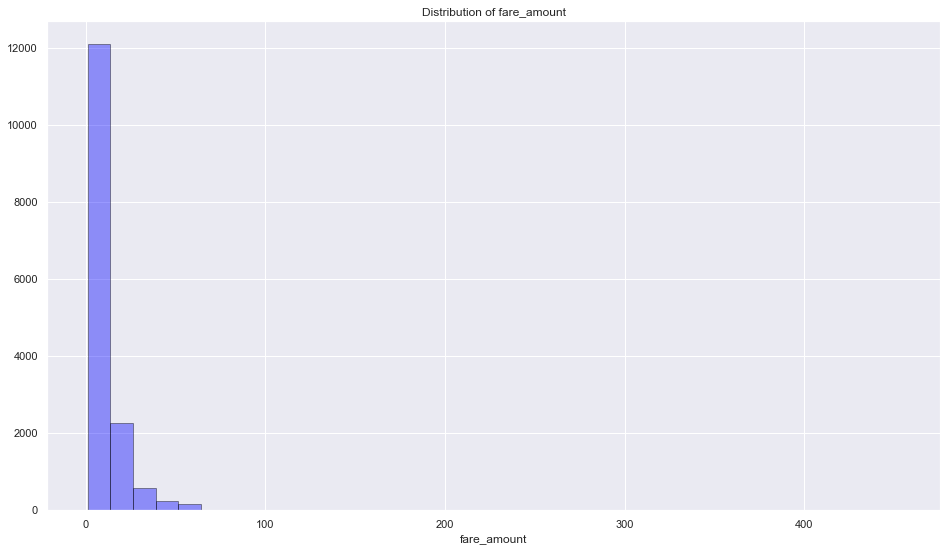

In [75]:
#Now lets look into distribution of df.fare_amount
plt.figure(figsize=(16,9))
# seaborn histogram
sns.distplot(df['fare_amount'], hist=True, kde=False, 
             bins=int(180/5), color = 'blue',
             hist_kws={'edgecolor':'black'})
# Add labels
plt.title('Distribution of fare_amount')

OBSERVATION: fare_amount is highly skewed. Needs Normalization

Text(0.5, 1.0, 'Distribution of distance')

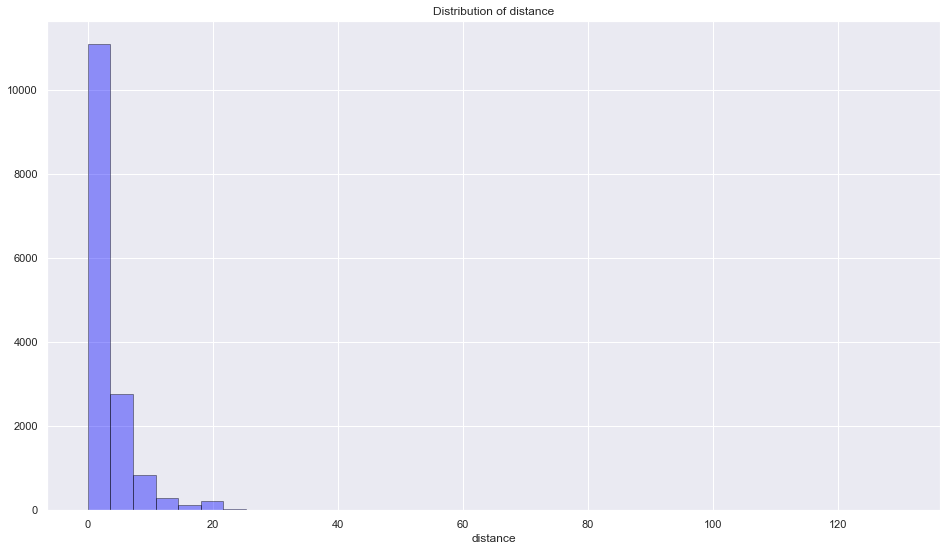

In [76]:
#Now lets look into distribution of df.distance
plt.figure(figsize=(16,9))
# seaborn histogram
sns.distplot(df['distance'], hist=True, kde=False, 
             bins=int(180/5), color = 'blue',
             hist_kws={'edgecolor':'black'})
# Add labels
plt.title('Distribution of distance')

OBSERVATION: distance is highly skewed. Needs Normalization

<AxesSubplot:xlabel='fare_amount', ylabel='Density'>

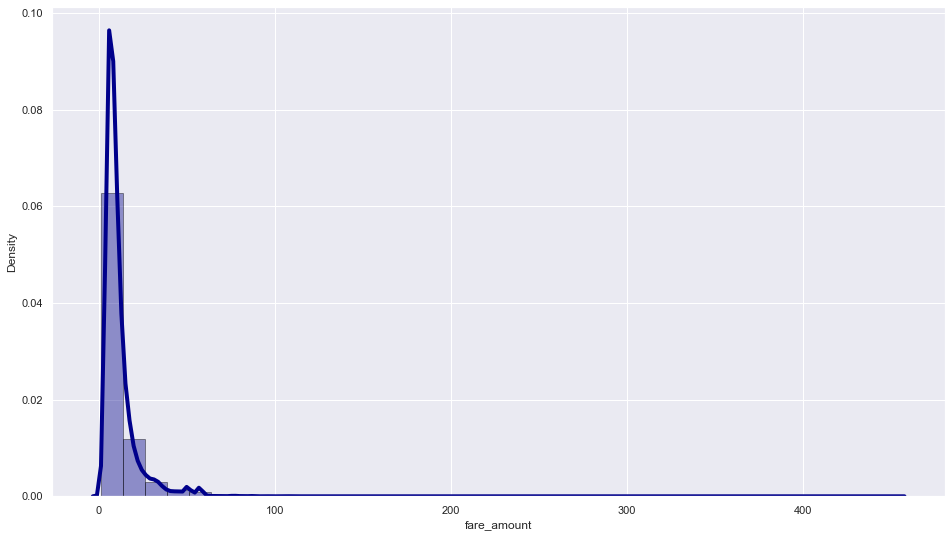

In [77]:
# Density Plot and Histogram of fare_amount
plt.figure(figsize=(16,9))
sns.distplot(df['fare_amount'], hist=True, kde=True, 
             bins=int(180/5), color = 'darkblue', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4})

C:\Users\Sreejith\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='distance', ylabel='Density'>

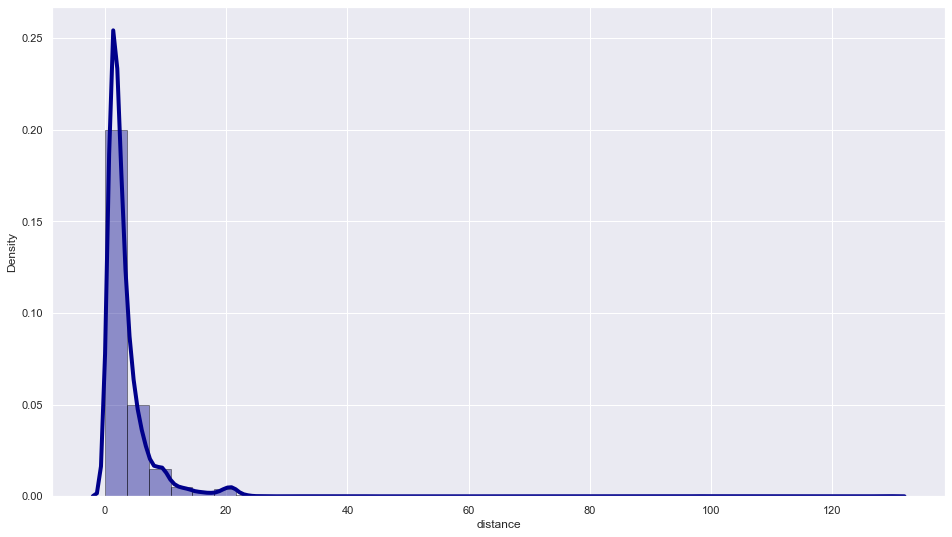

In [78]:
# Density Plot and Histogram of df.distance
plt.figure(figsize=(16,9))
sns.distplot(df['distance'], hist=True, kde=True, 
             bins=int(180/5), color = 'darkblue', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4})

C:\Users\Sreejith\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='distance', ylabel='Density'>

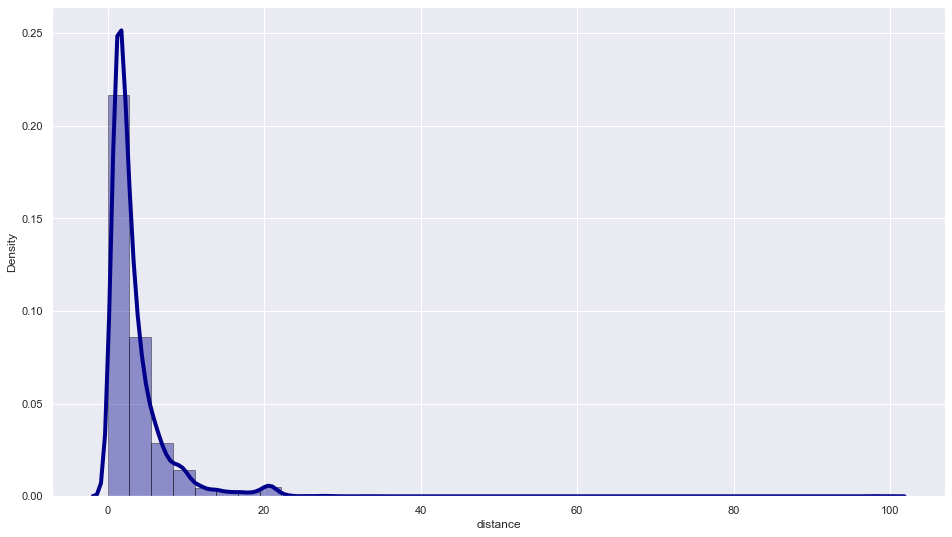

In [79]:
# Density Plot and Histogram of df1.distance 
plt.figure(figsize=(16,9))
sns.distplot(df1['distance'], hist=True, kde=True, 
             bins=int(180/5), color = 'darkblue', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4})

In [80]:
#since skewness of fare_amount is high, apply log transform to reduce the skewness-
df['fare_amount'] = np.log1p(df['fare_amount'])

#since skewness of df.distance variable is high, apply log transform to reduce the skewness-
df['distance'] = np.log1p(df['distance'])

#since skewness of df1.distance variable is high, apply log transform to reduce the skewness-
df1['distance'] = np.log1p(df['distance'])

C:\Users\Sreejith\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='fare_amount', ylabel='Density'>

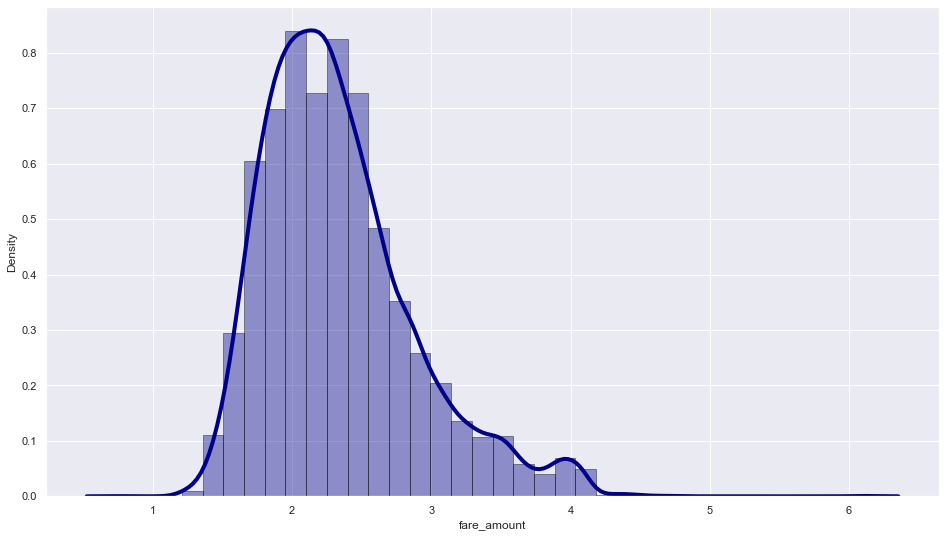

In [81]:
# Density Plot and Histogram of fare_amount after log transform
plt.figure(figsize=(16,9))
sns.distplot(df['fare_amount'], hist=True, kde=True, 
             bins=int(180/5), color = 'darkblue', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4})

C:\Users\Sreejith\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='distance', ylabel='Density'>

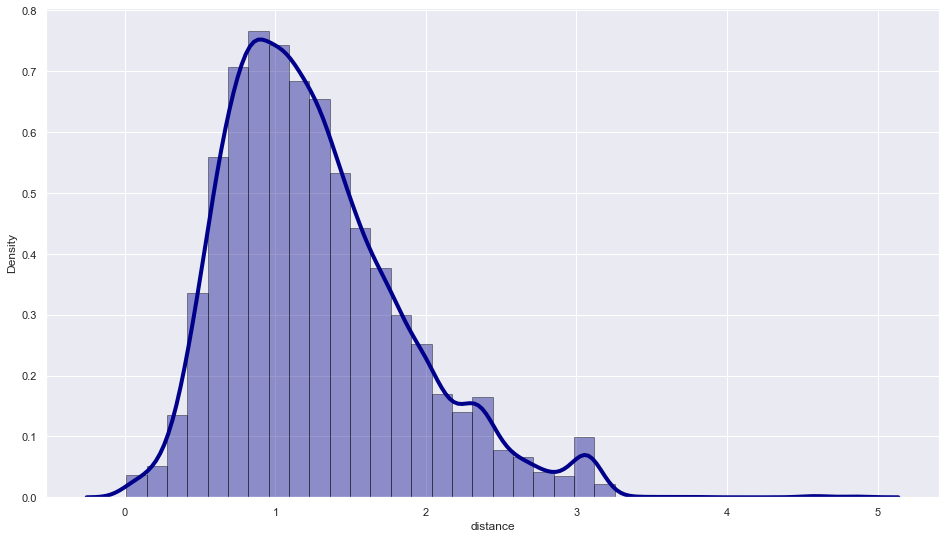

In [82]:
# Density Plot and Histogram of df.distance after log transform
plt.figure(figsize=(16,9))
sns.distplot(df['distance'], hist=True, kde=True, 
             bins=int(180/5), color = 'darkblue', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4})

C:\Users\Sreejith\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='distance', ylabel='Density'>

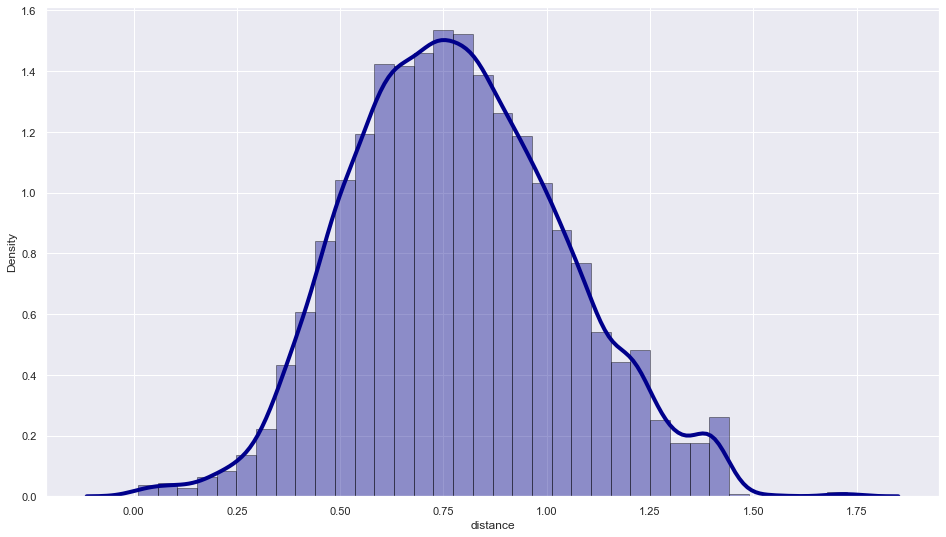

In [83]:
# Density Plot and Histogram of df1.distance after log transform
plt.figure(figsize=(16,9))
sns.distplot(df1['distance'], hist=True, kde=True, 
             bins=int(180/5), color = 'darkblue', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4})

In [84]:
#cat=['passenger_count', 'year', 'month', 'date', 'day', 'hour', 'season']

In [85]:
#df_dummy=pd.get_dummies(df,columns=cat)

In [86]:
#df_dummy.head()

In [87]:
#df1_dummy=pd.get_dummies(df1,columns=cat)

# Model

In [88]:
#df_dummy.info()

In [89]:
#df1_dummy.info()

In [90]:
##train test split for further modelling
X_train, X_test, y_train, y_test = train_test_split( df.iloc[:, df.columns != 'fare_amount'], 
                         df.iloc[:, 0], test_size = 0.20, random_state = 15)

In [91]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12304 entries, 5048 to 7992
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   passenger_count  12304 non-null  int64  
 1   year             12304 non-null  int64  
 2   month            12304 non-null  int64  
 3   date             12304 non-null  int64  
 4   day              12304 non-null  int64  
 5   hour             12304 non-null  int64  
 6   distance         12304 non-null  float64
dtypes: float64(1), int64(6)
memory usage: 769.0 KB


In [92]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3076 entries, 15547 to 2879
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   passenger_count  3076 non-null   int64  
 1   year             3076 non-null   int64  
 2   month            3076 non-null   int64  
 3   date             3076 non-null   int64  
 4   day              3076 non-null   int64  
 5   hour             3076 non-null   int64  
 6   distance         3076 non-null   float64
dtypes: float64(1), int64(6)
memory usage: 192.2 KB


# Linear Regression

In [93]:
# Building model on top of training dataset
LR_model = LinearRegression().fit(X_train , y_train)

In [94]:
#prediction on train data
pred_train_LR = LR_model.predict(X_train)

In [95]:
#calculate R^2 for train data
r2_score(y_train, pred_train_LR)

0.778850019482756

In [96]:
#prediction on test data
pred_test_LR=LR_model.predict(X_test)

In [97]:
#calculate R^2 for test data
r2_score(y_test, pred_test_LR)

0.7568103183377324

In [98]:
##calculating RMSE for test data
RMSE_test_LR = np.sqrt(mean_squared_error(y_test, pred_test_LR))

##calculating RMSE for train data
RMSE_train_LR= np.sqrt(mean_squared_error(y_train, pred_train_LR))

print("Root Mean Squared Error For Training data = "+str(RMSE_train_LR))
print("Root Mean Squared Error For Test data = "+str(RMSE_test_LR))

Root Mean Squared Error For Training data = 0.2535800950130984
Root Mean Squared Error For Test data = 0.2747354277685536


In [99]:

#mape                                    #av= actual value and pv= predicted value
def mape(av, pv): 
    mape = np.mean(np.abs((av - pv) / av))*100
    return mape


In [100]:
#Prediction Accuracy of train data 
print("Accuracy For Training data = "+str(100-mape(y_train, pred_train_LR)))

Accuracy For Training data = 92.61400151023895


In [101]:
#Prediction Accuracy of test data
print("Accuracy For Test data = "+str(100-mape(y_test, pred_test_LR)))

Accuracy For Test data = 92.45556454100387


# Decision Tree Regressor

In [102]:

DT_model = DecisionTreeRegressor(max_depth = 2).fit(X_train,y_train)

In [103]:
#prediction on train data
pred_train_DT = DT_model.predict(X_train)

In [104]:
#calculate R^2 for train data
r2_score(y_train, pred_train_DT)

0.7207665477011631

In [105]:
#prediction on test data
pred_test_DT=DT_model.predict(X_test)

In [106]:
#calculate R^2 for test data
r2_score(y_test, pred_test_DT)

0.6872577148354926

In [107]:
##calculating RMSE for test data
RMSE_test_DT = np.sqrt(mean_squared_error(y_test, pred_test_DT))

##calculating RMSE for train data
RMSE_train_DT= np.sqrt(mean_squared_error(y_train, pred_train_DT))

print("Root Mean Squared Error For Training data = "+str(RMSE_train_DT))
print("Root Mean Squared Error For Test data = "+str(RMSE_test_DT))

Root Mean Squared Error For Training data = 0.28494131903492004
Root Mean Squared Error For Test data = 0.3115554816088988


In [108]:
print("Accuracy For Training data = "+str(100-mape(y_train, pred_train_DT)))

Accuracy For Training data = 90.70041140561506


In [109]:
print("Accuracy For Test data = "+str(100-mape(y_test, pred_test_DT)))

Accuracy For Test data = 90.43309314815382


BOTH MODELS PERFORMS WELL ON THE DATA. HoWEVER, LINEAR REGRESSION MODEL OUTPERFORMS DECISION TREE MARGINALLY. HENCE, WE CAN SELECT LINEAR REGRESSION FOR THE FINAL PREDICTION

In [111]:
df1.describe()
df1.isna().any()
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9822 entries, 0 to 9913
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   passenger_count  9822 non-null   int64  
 1   year             9822 non-null   int64  
 2   month            9822 non-null   int64  
 3   date             9822 non-null   int64  
 4   day              9822 non-null   int64  
 5   hour             9822 non-null   int64  
 6   distance         9373 non-null   float64
dtypes: float64(1), int64(6)
memory usage: 613.9 KB


In [120]:
#FINAL PREDICTION
Final_prediction=LR_model.predict(df1)

In [121]:
df1['predicted_fare']=Final_prediction

In [122]:
df1.head()

,passenger_count,year,month,date,day,hour,distance,predicted_fare
0,1,2015,1,27,1,13,0.535378,1.867531
1,1,2015,1,27,1,13,1.177259,2.365893
2,1,2011,10,8,5,11,0.626328,1.816956
3,1,2012,12,1,5,21,0.847732,2.042075
4,1,2012,12,1,5,21,0.740943,1.959163


In [123]:
#SAVE CSV WITH PREDICTED FARE
df1.to_csv('PREDICTED_FARE_PYTHON.csv')

C:\Users\Sreejith\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='predicted_fare', ylabel='distance'>

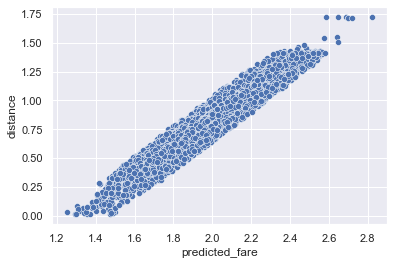

In [126]:
sns.scatterplot(df1['predicted_fare'],df1['distance'])

# EXTRA: Random Forest Regressor

In [108]:
#RF_model = RandomForestRegressor(n_estimators = 200).fit(X_train,y_train)

In [109]:
#prediction on train data
#pred_train_RF =RF_model.predict(X_train)

In [110]:
#calculate R^2 for train data
#r2_score(y_train, pred_train_RF)

0.9725958585841731

In [111]:
#prediction on test data
#pred_test_RF=RF_model.predict(X_test)

In [112]:
#calculate R^2 for test data
#r2_score(y_test, pred_test_DT)

0.687257714835493

In [113]:
##calculating RMSE for test data
#RMSE_test_RF = np.sqrt(mean_squared_error(y_test, pred_test_RF))

##calculating RMSE for train data
#RMSE_train_RF= np.sqrt(mean_squared_error(y_train, pred_train_RF))

#print("Root Mean Squared Error For Training data = "+str(RMSE_train_RF))
#print("Root Mean Squared Error For Test data = "+str(RMSE_test_RF))

Root Mean Squared Error For Training data = 0.08926471186920498
Root Mean Squared Error For Test data = 0.2652420602803465


In [114]:
#print("Accuracy For Training data = "+str(100-mape(y_train, pred_train_RF)))
#print("Accuracy For Test data = "+str(100-mape(y_test, pred_test_RF)))

Accuracy For Training data = 97.29059899529852
Accuracy For Test data = 92.51187492335329
